# Lab 3
Charlotte Ring
5/7/19

In [24]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import mapclassify as mc
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline

ModuleNotFoundError: No module named 'contextily'

In [14]:
df = gpd.read_file('airbnb/airbnb_Chicago 2015.shp')

In [15]:
df.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,POLYGON ((-87.60914087617012 41.84469250346108...
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.592152838785 41.81692934706861, ..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,POLYGON ((-87.62879823732874 41.80189303448802...
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,POLYGON ((-87.60670812560372 41.81681377137391...
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.592152838785 41.81692934706861, ..."


In [16]:
pd.isnull(df['price_pp']).sum()

8

Fill na values

In [17]:
df = df
df['price_pp'].fillna((df['price_pp'].mean()), inplace=True)

In [59]:
import seaborn as sbn

Visualize the statistical distribution of the median price of listings across neighborhoods:

/Users/Charlotte/t_rax/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


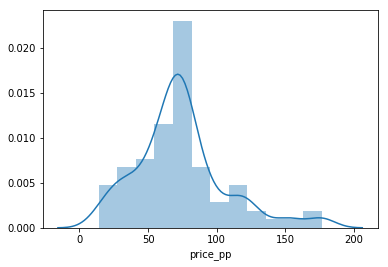

In [19]:
sbn.distplot(df['price_pp'])

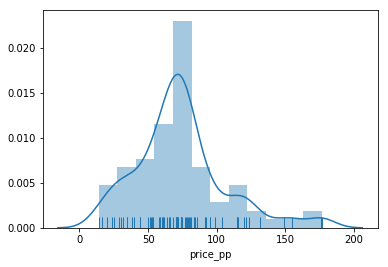

In [20]:
sbn.distplot(df['price_pp'], rug=True)

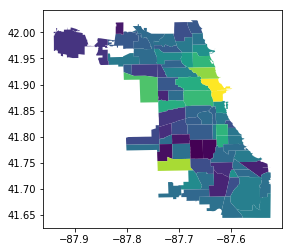

In [22]:
df.plot(column='price_pp')

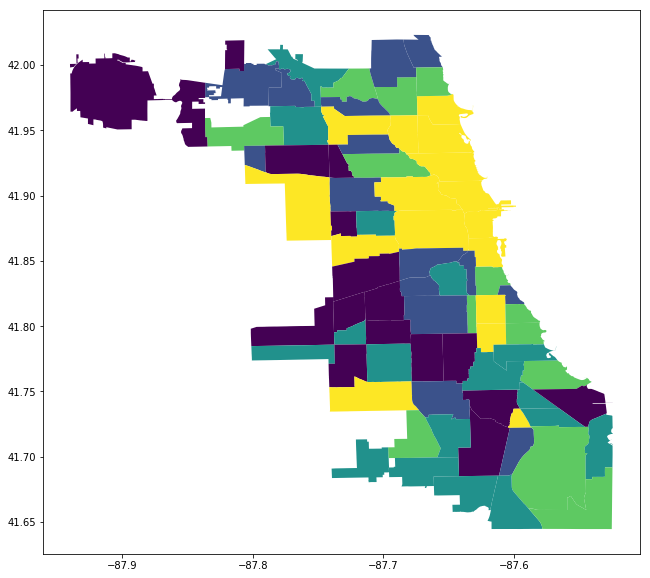

In [44]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', ax=ax)

Add Legend

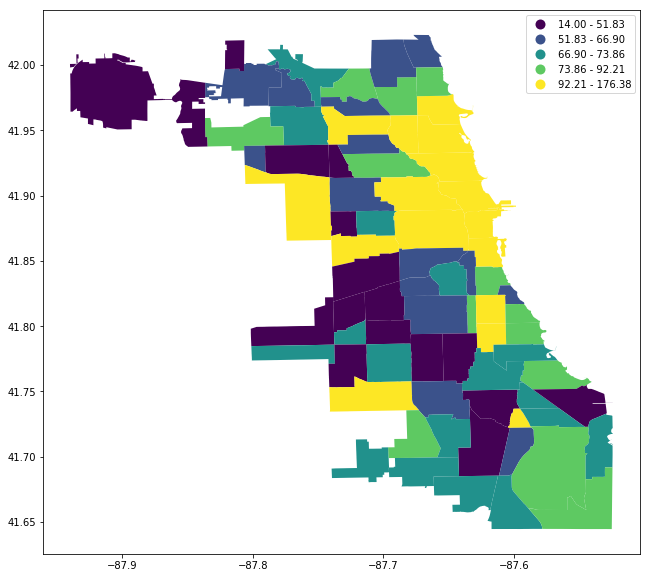

In [45]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles',  legend=True, ax=ax)

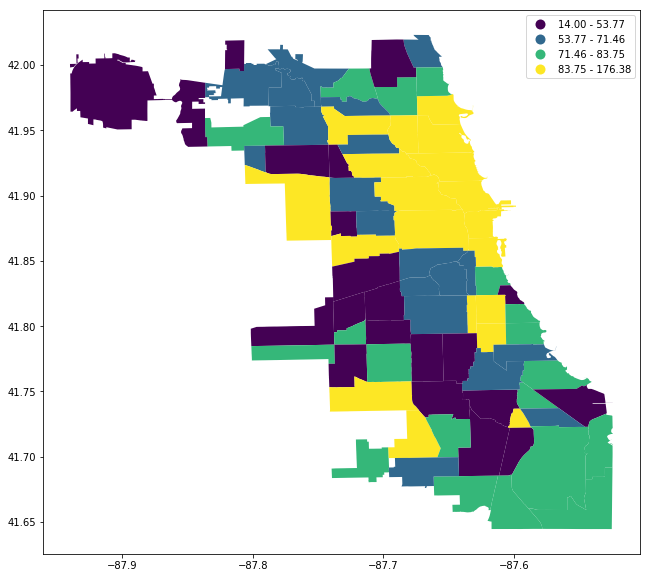

In [46]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax)

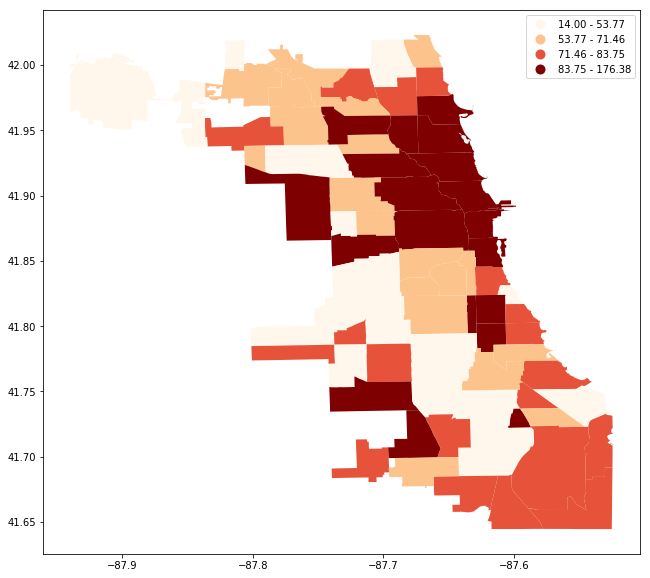

In [47]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax, 
        cmap='OrRd')

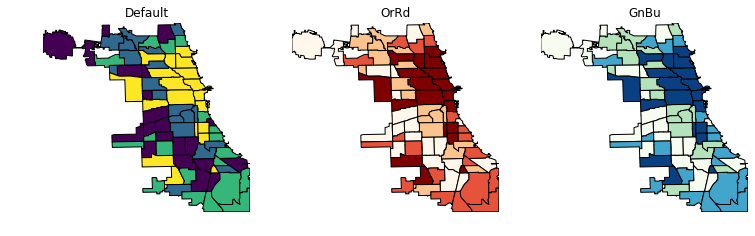

In [48]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Default")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("OrRd")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("GnBu")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [25]:
mc.CLASSIFIERS

('Box_Plot',
 'Equal_Interval',
 'Fisher_Jenks',
 'Fisher_Jenks_Sampled',
 'HeadTail_Breaks',
 'Jenks_Caspall',
 'Jenks_Caspall_Forced',
 'Jenks_Caspall_Sampled',
 'Max_P_Classifier',
 'Maximum_Breaks',
 'Natural_Breaks',
 'Quantiles',
 'Percentiles',
 'Std_Mean',
 'User_Defined')

In [26]:
y = df['price_pp']
ea5 = mc.Equal_Interval(y, k=5)

In [27]:
ea5

              Equal Interval              
 
 Lower            Upper              Count
          x[i] <=  46.475               14
 46.475 < x[i] <=  78.950               38
 78.950 < x[i] <= 111.425               14
111.425 < x[i] <= 143.900                7
143.900 < x[i] <= 176.376                4

In [28]:
ea5.yb

array([1, 1, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 3, 3, 2, 0, 1, 2, 1, 1, 4, 4, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 4, 4, 1, 2, 1, 1, 1, 0, 1, 0])

In [29]:
q5 = mc.Quantiles(y, k=5)
q5

/Users/Charlotte/t_rax/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


                Quantiles                 
 
 Lower            Upper              Count
          x[i] <=  51.833               16
 51.833 < x[i] <=  66.897               15
 66.897 < x[i] <=  73.864               17
 73.864 < x[i] <=  92.206               13
 92.206 < x[i] <= 176.376               16

In [30]:
q5.yb

array([3, 1, 3, 4, 3, 3, 4, 3, 2, 1, 1, 2, 3, 1, 2, 4, 3, 1, 0, 1, 0, 1,
       3, 1, 4, 4, 0, 2, 4, 4, 4, 0, 1, 4, 1, 1, 4, 4, 3, 0, 2, 0, 4, 2,
       0, 4, 1, 3, 2, 2, 2, 3, 0, 0, 0, 1, 4, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 4, 4, 1, 3, 2, 2, 2, 0, 3, 0])

In [31]:
y.shape

(77,)

In [32]:
np.unique(y).shape

(67,)

In [33]:
q5 = mc.Quantiles(y, k=5)
ei5 = mc.Equal_Interval(y, k=5)
mb5 = mc.Maximum_Breaks(y, k=5)
fj5 = mc.Fisher_Jenks(y, k=5)
fits = [c.adcm for c in [q5, ei5, mb5, fj5]]
fits

[598.0520588840582, 539.643737884058, 1096.390616884058, 488.9713821014492]

In [34]:
ht = mc.HeadTail_Breaks(y)
ht

             HeadTail_Breaks              
 
 Lower            Upper              Count
          x[i] <=  73.864               48
 73.864 < x[i] <=  98.160               16
 98.160 < x[i] <= 130.727                8
130.727 < x[i] <= 157.566                3
157.566 < x[i] <= 176.254                1
176.254 < x[i] <= 176.376                1

In [35]:
std = mc.Std_Mean(y)
std

                 Std_Mean                 
 
 Lower            Upper              Count
          x[i] <=   7.250                0
  7.250 < x[i] <=  40.557               12
 40.557 < x[i] <= 107.170               54
107.170 < x[i] <= 140.477                7
140.477 < x[i] <= 176.376                4

In [36]:
bp = mc.Box_Plot(y)
bp

/Users/Charlotte/t_rax/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <=   8.812                0
  8.812 < x[i] <=  53.775               20
 53.775 < x[i] <=  71.458               19
 71.458 < x[i] <=  83.750               19
 83.750 < x[i] <= 128.713               14
128.713 < x[i] <= 176.376                5

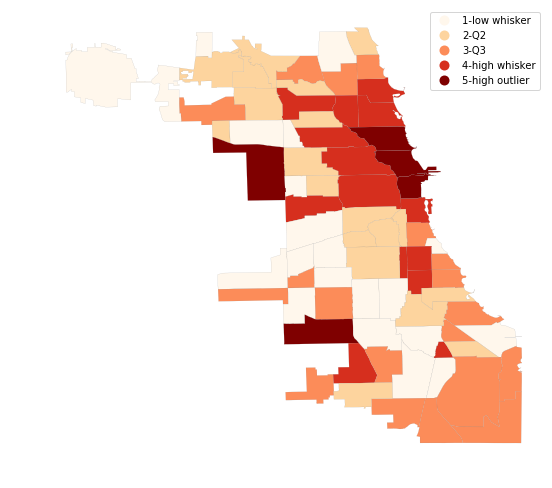

In [37]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()

# Challenge

In [39]:
import palettable as pltt

In [57]:
from matplotlib.colors import ListedColormap

From the palettable documentation:

In [70]:
cmap = ListedColormap(pltt.wesanderson.Darjeeling2_5.mpl_colors)


But it doesn't seem to work.

ValueError: Colormap cmap is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

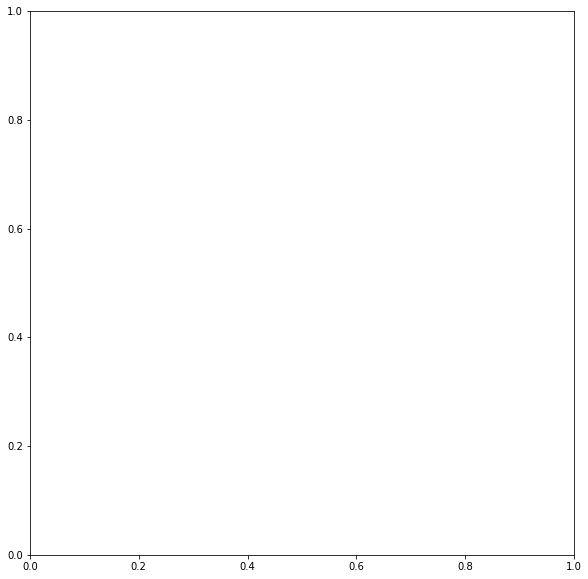

In [71]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax, 
        cmap='cmap')

# Extension

I liked the look of arranging multiple plots, so I decided to compare styles of break included with mapclassify. The side-by-side comparsion allows easy determination of the most visually-informative map. Below I compare 5 different schemes of classification, with the same number of breaks and same palette. 

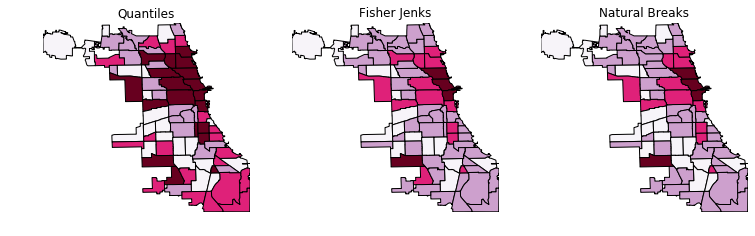

In [54]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='PuRd', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Quantiles")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='Fisher_Jenks', cmap='PuRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Fisher Jenks")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
        scheme='Natural_Breaks', cmap='PuRd', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Natural Breaks")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

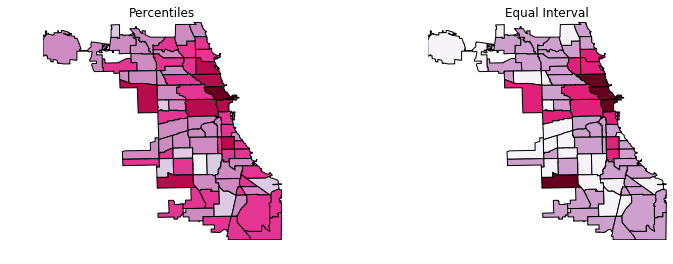

In [78]:
f,ax = plt.subplots(1,2,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="Percentiles", cmap='PuRd', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Percentiles")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='Equal_Interval', cmap='PuRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Equal Interval")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

Interestingly, the Natural Breaks, Fisher Jenks, and Equal Interval maps look almost identical. From this it can be inferred that the data are normally distributed, because equal intervals on skewed data look misleading and very different from the natural break algorithims. 